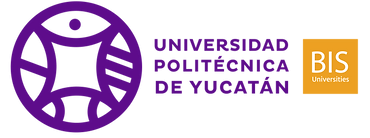

### EDA Sin jaguar dia

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from sklearn import cluster

In [2]:
number_classes = {
'Lote 1': len(os.listdir("Sin jaguar dia/lote 1")),
'Lote 2': len(os.listdir("Sin jaguar dia/lote 2")),
'Lote 3': len(os.listdir("Sin jaguar dia/lote 3 - camara")),
'Lote 4': len(os.listdir("Sin jaguar dia/lote 4 - camara"))
}

In [3]:
number_classes = {
'Lote 1': len(os.listdir("Sin jaguar dia/lote 1")),
'Lote 3': len(os.listdir("Sin jaguar dia/lote 3 - camara")),
}

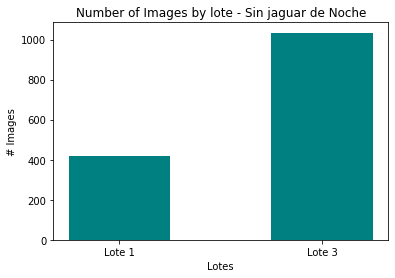

In [6]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5, color = "teal");
plt.title("Number of Images by lote - Sin jaguar de Noche");
plt.xlabel('Lotes');
plt.ylabel('# Images');

In [7]:
directories = {
'Lote 1': 'Sin jaguar dia/lote 1/',
'Lote 3': 'Sin jaguar dia/lote 3 - camara/'
}

In [8]:
def get_dims(img):
    Y,X = img.shape[0], img.shape[1]
    return Y,X

In [9]:
h_list = []
w_list = []

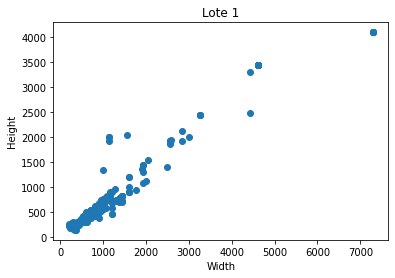

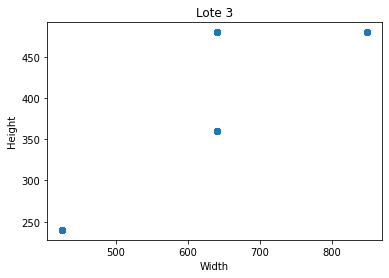

In [10]:
for key,value in directories.items():
    filepath = value
    filelist = [filepath + f for f in os.listdir(filepath)]


    for pathImage in filelist:
        img = cv2.imread(pathImage)
        if type(img) != type(None):
            y,x = get_dims(img)
            h_list.append(y)
            w_list.append(x)

    plt.scatter(w_list, h_list)

    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(key)
    plt.show()
    h_list = []
    w_list = []

## Lote 1

In [11]:
image_folder_1 = "Sin jaguar dia/lote 1"
image_names_1= os.listdir(image_folder_1)
print(len(image_names_1))

416


### Sample of data 

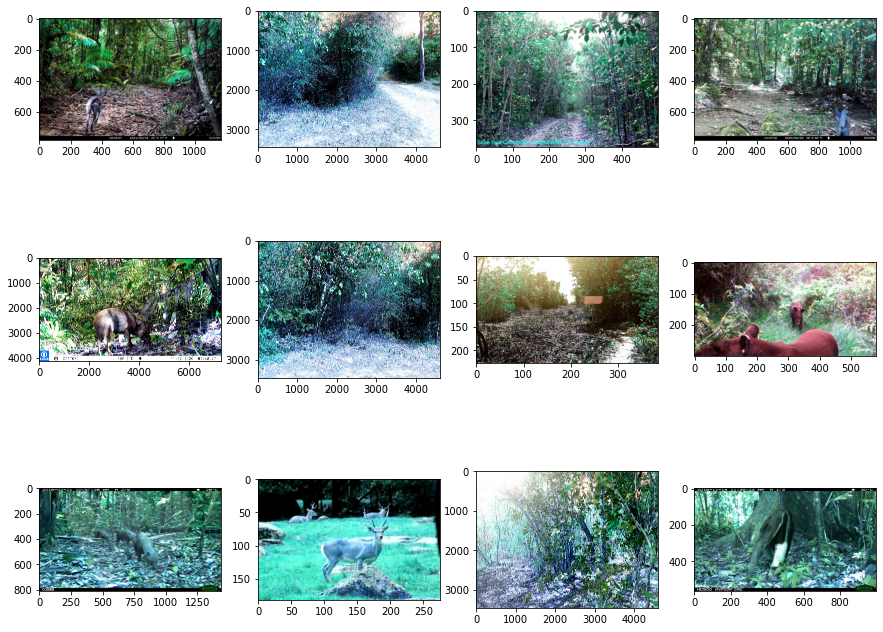

In [12]:
aux_list = []
c = 0
plt.figure(figsize=(15,12))

for image_name in image_names_1[0:12]:
    image_path = image_folder_1 + "/" + image_name
    image = cv2.imread(image_path)
    aux_list.append(image_name)
    
    plt.subplot(3,4, c+1)
    c +=1
    plt.imshow(image)

#### Class

In [81]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))
        
        #self.mat = np.reshape(img, (self.dims[0], self.dims[1]))
    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))
    
    def bnormalize(self):
        """much faster brightness normalization, since it's all vectorized"""
    
        bnorm = np.zeros_like(self.mat, dtype=np.float32)
        maxes = np.max(self.mat, axis=1)
        bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T
        return bnorm
    
    def bnormFunction(self):
        bnorm = self.bnormalize()
        bnorm_img = self.to_matched_img(bnorm)
        return bnorm_img
    
    
    def Kmeans(self):
        plt.figure(figsize=(13,7))
        plt.subplot(221)
        plt.title("Original Image")
        plt.imshow(self.img)

        plt.subplot(222)
        kmeans = cluster.KMeans(2)
        prediction = kmeans.fit_predict(self.mat)
        clustered = np.reshape(prediction, (self.dims[0], self.dims[1]))
        plt.title("Kmeans = 2")
        plt.imshow(clustered)
        
        plt.subplot(223)
        kmeans_1 = cluster.KMeans(3)
        prediction_1= kmeans_1.fit_predict(self.mat)
        clustered_1 = np.reshape(prediction_1, (self.dims[0], self.dims[1]))
        plt.title("Kmeans = 3")
        plt.imshow(clustered_1)
        
        plt.subplot(224)
        kmeans_2 = cluster.KMeans(4)
        prediction_2= kmeans_2.fit_predict(self.mat)
        clustered_2 = np.reshape(prediction_2, (self.dims[0], self.dims[1]))
        plt.title("Kmeans = 4")
        plt.imshow(clustered_2)
        
    def plotImages(self):
        bnorm_img = self.bnormFunction()
        
        plt.figure(figsize=(13,7))
        
        plt.subplot(221)
        plt.title("Normalization Image")
        plt.imshow(bnorm_img)
        plt.subplot(222)
        plt.imshow(self.image[:,:,2] > 100)
        plt.subplot(223)
        plt.imshow(bnorm_img[:,:,0] > 0.999)
        plt.subplot(224)
        plt.imshow((bnorm_img[:,:,0] < 0.9999) & \
                   (bnorm_img[:,:,1] < 0.9999) & \
                   (bnorm_img[:,:,2] > 0.9999))

        plt.show()

In [42]:
print(aux_list)

['292.jpg', '383.jpg', '157.jpg', '282.jpg', '218.jpg', '385.jpg', '130.jpg', '243.jpg', '159.jpg', '30.jpg', '417.jpg', '259.jpg']


### i292

In [50]:
i292 = cv2.imread("Sin jaguar dia/lote 1/292.jpg")
msi292 = MSImage(i292)

In [56]:
b =i292[:,:,0]
g =i292[:,:,1]
r =i292[:,:,2]

bgr = np.hstack([b,g,r])
cv2.imshow('capas', bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()


#plt.figure(figsize = (12,10))
#plt.imshow(bgr)

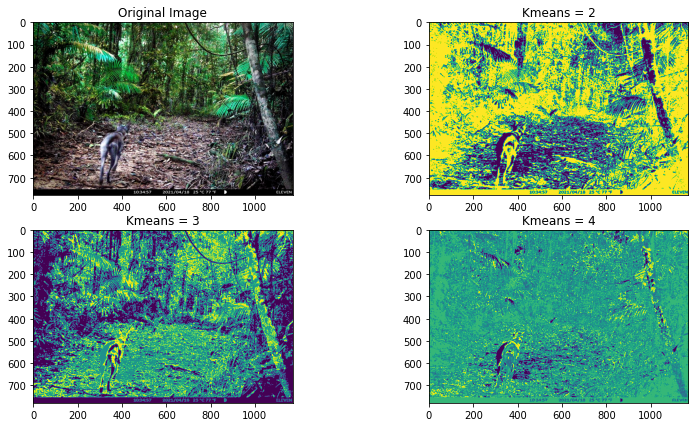

In [51]:
msi292.Kmeans()

/tmp/ipykernel_5504/163300168.py:34: RuntimeWarning: invalid value encountered in divide
  bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T


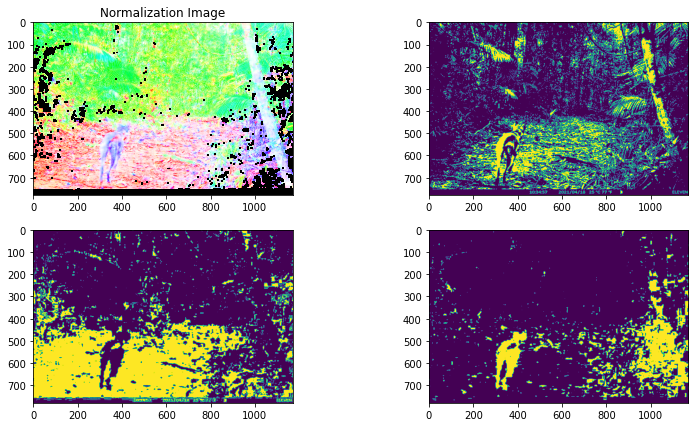

In [41]:
msi292.plotImages()

### i 383

In [48]:
i383 = cv2.imread("Sin jaguar dia/lote 1/383.jpg")
msi383 = MSImage(i383)

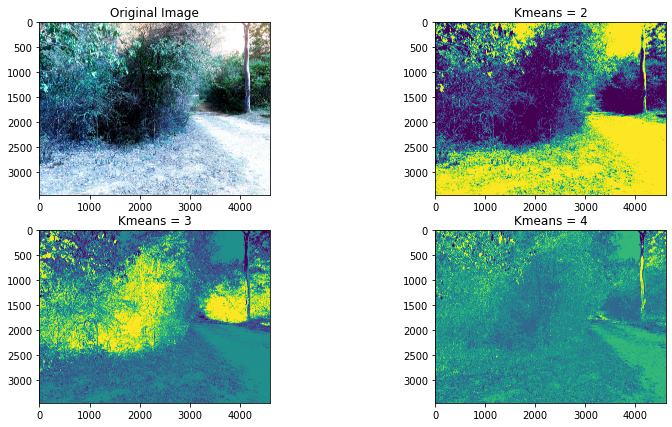

In [49]:
msi383.Kmeans()

/tmp/ipykernel_5504/163300168.py:34: RuntimeWarning: invalid value encountered in divide
  bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T


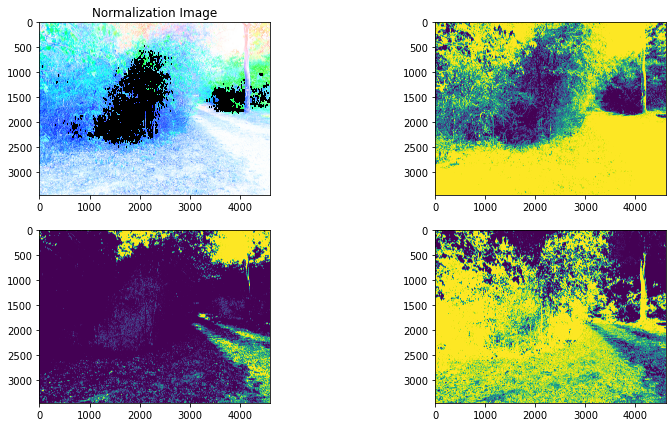

In [45]:
msi383.plotImages()

### i157

In [57]:
i157 = cv2.imread("Sin jaguar dia/lote 1/157.jpg")
msi157 = MSImage(i157)

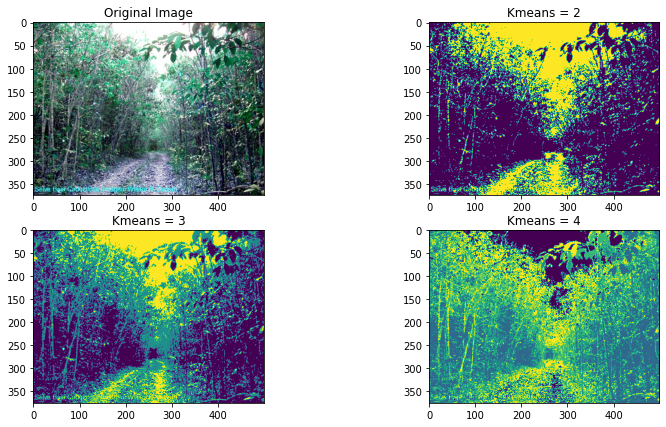

In [59]:
msi157.Kmeans()

/tmp/ipykernel_5504/3534895792.py:34: RuntimeWarning: invalid value encountered in divide
  bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T


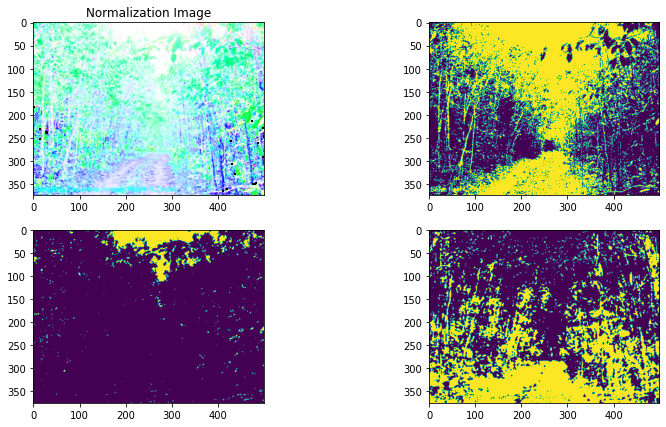

In [60]:
msi157.plotImages()

### i282

In [82]:
i243= cv2.imread("Sin jaguar dia/lote 1/243.jpg")
msi243 = MSImage(i243)

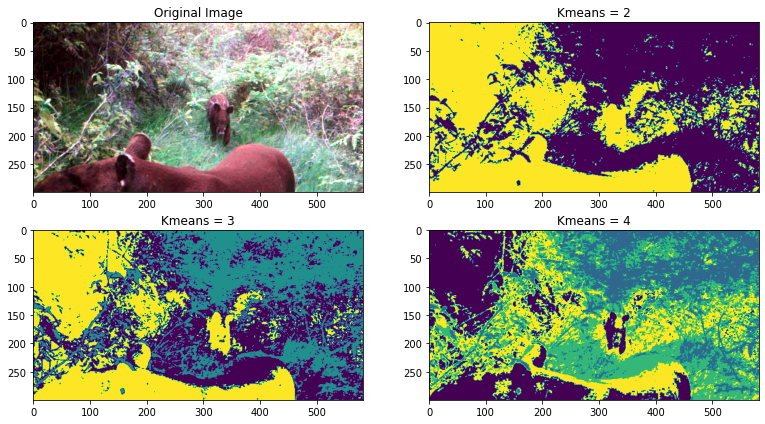

In [70]:
msi243.Kmeans()

/tmp/ipykernel_5504/3820815592.py:34: RuntimeWarning: invalid value encountered in divide
  bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T


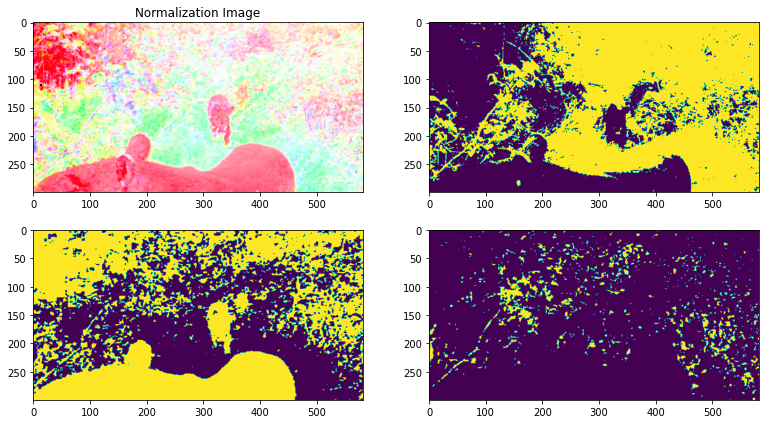

In [83]:
msi243.plotImages()

### i218

In [64]:
i218= cv2.imread("Sin jaguar dia/lote 1/218.jpg")
msi218 = MSImage(i218)

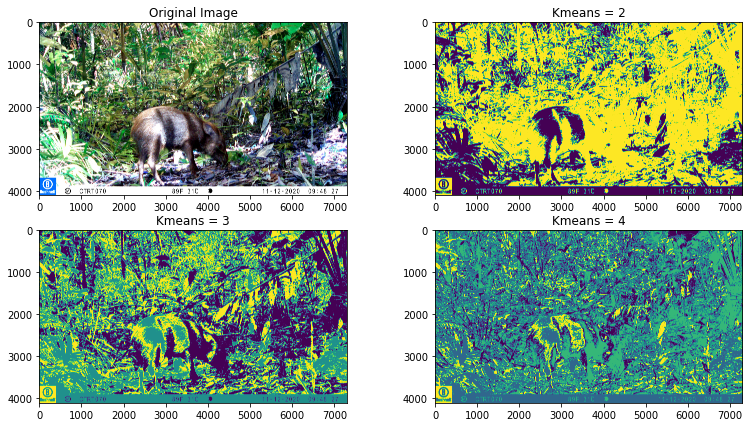

In [65]:
msi218.Kmeans()

/tmp/ipykernel_5504/3534895792.py:34: RuntimeWarning: invalid value encountered in divide
  bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T


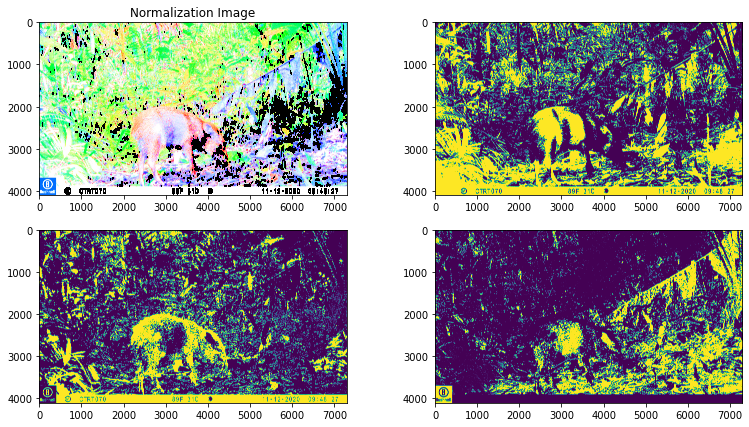

In [66]:
msi218.plotImages()

### i 385

In [74]:
i385= cv2.imread("Sin jaguar dia/lote 1/385.jpg")
msi385 = MSImage(i385)

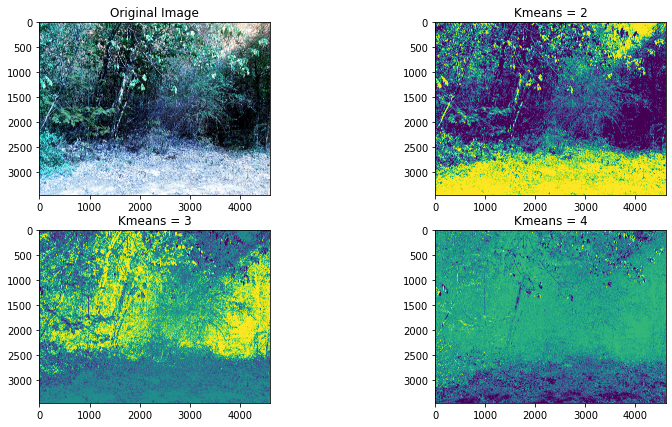

In [68]:
msi385.Kmeans()

/tmp/ipykernel_5504/2939874617.py:34: RuntimeWarning: invalid value encountered in divide
  bnorm = self.mat / np.vstack((maxes, maxes, maxes)).T


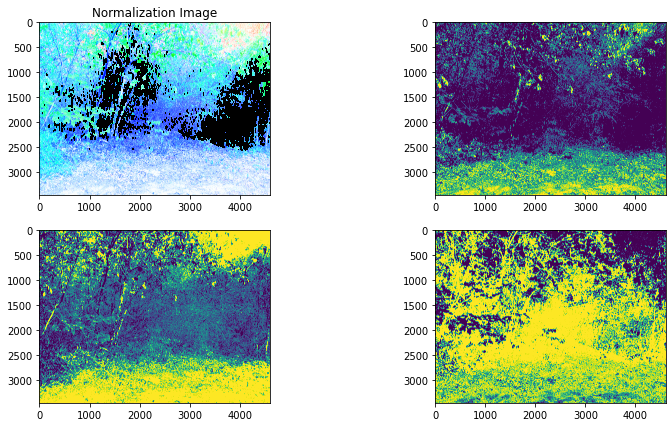

In [75]:
msi385.plotImages()

## prueba 

In [2]:
i30= cv2.imread("Sin jaguar dia/lote 1/30.jpg")

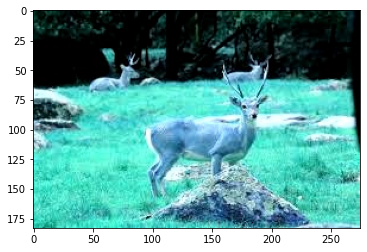

In [3]:
# 15-80 
plt.imshow(i30)

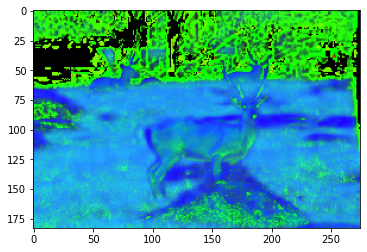

In [4]:
frameHSV=cv2.cvtColor(i30,cv2.COLOR_BGR2HSV)
plt.imshow(frameHSV)

In [7]:
green_bajo = np.array([20,100,20],np.uint8)
green_alto = np.array([80,255,255],np.uint8)

In [10]:
maskgreen =cv2.inRange(frameHSV,green_bajo,green_alto)
maskGvis = cv2.bitwise_and(frameHSV,frameHSV, mask = maskgreen)

#cv2.imshow('Green Mask' ,maskgreen)
#cv2.imshow('imagen',i30)
cv2.imshow('Green Mask vis' ,maskGvis)
cv2.waitKey(0)
cv2.destroyAllWindows()